In [1]:
#===========================================
# import modules, defs and variables
#===========================================
exec(open("./MSI-generator-external.py").read())
exec(open("./MSI-generator-def.py").read())

from pyimzml.ImzMLWriter import ImzMLWriter
from tifffile import TiffWriter, OmeXml

print('Finish modules, defs and variables import, next step: check the dimensionality of this MSI data set.')

Finish modules, defs and variables import, next step: check the dimensionality of this MSI data set.


## 1. extract ion images from .RAW

### configurations

In [2]:
# number of line scan folders
NumLine = 160                                                              # edit number of lines

# specify .raw file dir
NameBody = "D:\\Manxi\\HubMAP\\human heart1 20210330\\lines\\UH"      # edit
NamePost = ".raw"                                                           # edit

# specify mass list file dir
MassList_dir = "D:\\Manxi\\HubMAP\\human heart1 20210330\\HBM433.FHPB.264-lipids_pos_mode_LipidAssignments.xlsx"                # edit

# mass window
MassTolerance = 10

# Locate the extraction output folder. 
MSI_data_output = "D:\\Manxi\\HubMAP\\human heart1 20210330"                    # edit

# import mass list
MassList = pd.read_excel(MassList_dir)
mzs = np.round(MassList['m/z'].values.astype(float), 4)
names = MassList['assignment'].values.astype(str)

In [3]:
# check dimensions for all line scans
NumSpePerLine_unaligned = check_dim(NumLine, NameBody, NamePost)

           # of spectra
# of line              
1                   649
2                   654
3                   655
4                   651
5                   653
...                 ...
156                 656
157                 656
158                 652
159                 657
160                 655

[160 rows x 1 columns]

line scan spectra summary
# of lines is: 160
mean # of spectra is: 658
min # of spectra is: 649


In [4]:
# define total acquisition time to align pixels
AcqTime = 1.46
NumSpePerLine = 658
TimeStamps_aligned = np.linspace(0, AcqTime, NumSpePerLine)

In [5]:
# aspect
width = 3.5*1000 # um
height = 4*1000 # um
aspect_ratio = (height/(NumLine-1))/(width/(NumSpePerLine-1))
print(aspect_ratio)

4.722371967654986


### peak intensity extraction for all pixels (with time stamp alignment)

In [20]:
# pixel intensity extraction
pixels = get_pixels_values_nofilter(NameBody, NamePost, NumLine, NumSpePerLine_unaligned, TimeStamps_aligned, mzs, MassTolerance)

  0%|          | 0/649 [00:00<?, ?it/s]


line 1 is done, running time is:
1.3962664604187012
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 2 is done, running time is:
1.3415989875793457
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 3 is done, running time is:
1.3710126876831055
 


  0%|          | 0/651 [00:00<?, ?it/s]


line 4 is done, running time is:
1.3700413703918457
 


  0%|          | 0/653 [00:00<?, ?it/s]


line 5 is done, running time is:
1.3823044300079346
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 6 is done, running time is:
1.3683466911315918
 


  0%|          | 0/653 [00:00<?, ?it/s]


line 7 is done, running time is:
1.3114895820617676
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 8 is done, running time is:
1.3770668506622314
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 9 is done, running time is:
1.336426019668579
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 10 is done, running time is:
1.3743290901184082
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 11 is done, running time is:
1.4072377681732178
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 12 is done, running time is:
1.4062385559082031
 


  0%|          | 0/653 [00:00<?, ?it/s]


line 13 is done, running time is:
1.3660290241241455
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 14 is done, running time is:
1.4093034267425537
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 15 is done, running time is:
1.376936912536621
 


  0%|          | 0/650 [00:00<?, ?it/s]


line 16 is done, running time is:
1.1706938743591309
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 17 is done, running time is:
1.2906324863433838
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 18 is done, running time is:
1.363354206085205
 


  0%|          | 0/653 [00:00<?, ?it/s]


line 19 is done, running time is:
1.3623580932617188
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 20 is done, running time is:
1.3947091102600098
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 21 is done, running time is:
1.43930983543396
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 22 is done, running time is:
1.4192051887512207
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 23 is done, running time is:
1.3773174285888672
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 24 is done, running time is:
1.3596529960632324
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 25 is done, running time is:
1.354377031326294
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 26 is done, running time is:
1.2785913944244385
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 27 is done, running time is:
1.2775683403015137
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 28 is done, running time is:
1.2987439632415771
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 29 is done, running time is:
1.3085289001464844
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 30 is done, running time is:
1.3038015365600586
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 31 is done, running time is:
1.1979906558990479
 


  0%|          | 0/650 [00:00<?, ?it/s]


line 32 is done, running time is:
1.213705062866211
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 33 is done, running time is:
1.2776565551757812
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 34 is done, running time is:
1.3024792671203613
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 35 is done, running time is:
1.2680013179779053
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 36 is done, running time is:
1.309337854385376
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 37 is done, running time is:
1.3243694305419922
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 38 is done, running time is:
1.3426744937896729
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 39 is done, running time is:
1.3085005283355713
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 40 is done, running time is:
1.2956676483154297
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 41 is done, running time is:
1.2885565757751465
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 42 is done, running time is:
1.3165931701660156
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 43 is done, running time is:
1.282576084136963
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 44 is done, running time is:
1.3378331661224365
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 45 is done, running time is:
1.2811181545257568
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 46 is done, running time is:
1.3107404708862305
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 47 is done, running time is:
1.2394814491271973
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 48 is done, running time is:
1.2828247547149658
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 49 is done, running time is:
1.3035202026367188
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 50 is done, running time is:
1.302605390548706
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 51 is done, running time is:
1.278446912765503
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 52 is done, running time is:
1.2466790676116943
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 53 is done, running time is:
1.2509009838104248
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 54 is done, running time is:
1.2133781909942627
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 55 is done, running time is:
1.2924978733062744
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 56 is done, running time is:
1.3224782943725586
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 57 is done, running time is:
1.3129112720489502
 


  0%|          | 0/665 [00:00<?, ?it/s]


line 58 is done, running time is:
1.34403657913208
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 59 is done, running time is:
1.3463990688323975
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 60 is done, running time is:
1.3164799213409424
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 61 is done, running time is:
1.3075358867645264
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 62 is done, running time is:
1.3204381465911865
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 63 is done, running time is:
1.290578842163086
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 64 is done, running time is:
1.2951898574829102
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 65 is done, running time is:
1.3054790496826172
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 66 is done, running time is:
1.2772774696350098
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 67 is done, running time is:
1.2988471984863281
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 68 is done, running time is:
1.3031272888183594
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 69 is done, running time is:
1.2566683292388916
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 70 is done, running time is:
1.2725982666015625
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 71 is done, running time is:
1.320439100265503
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 72 is done, running time is:
1.3286736011505127
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 73 is done, running time is:
1.2864222526550293
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 74 is done, running time is:
1.2952277660369873
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 75 is done, running time is:
1.280576229095459
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 76 is done, running time is:
1.3019165992736816
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 77 is done, running time is:
1.255803108215332
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 78 is done, running time is:
1.2745692729949951
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 79 is done, running time is:
1.2680370807647705
 


  0%|          | 0/651 [00:00<?, ?it/s]


line 80 is done, running time is:
1.2356650829315186
 


  0%|          | 0/664 [00:00<?, ?it/s]


line 81 is done, running time is:
1.2656080722808838
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 82 is done, running time is:
1.3024852275848389
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 83 is done, running time is:
1.320469617843628
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 84 is done, running time is:
1.2935717105865479
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 85 is done, running time is:
1.3383913040161133
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 86 is done, running time is:
1.3554260730743408
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 87 is done, running time is:
1.3266398906707764
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 88 is done, running time is:
1.2983589172363281
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 89 is done, running time is:
1.3295059204101562
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 90 is done, running time is:
1.3892853260040283
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 91 is done, running time is:
1.3184757232666016
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 92 is done, running time is:
1.322460412979126
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 93 is done, running time is:
1.3044860363006592
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 94 is done, running time is:
1.2880241870880127
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 95 is done, running time is:
1.3258686065673828
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 96 is done, running time is:
1.3374238014221191
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 97 is done, running time is:
1.3383731842041016
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 98 is done, running time is:
1.3244588375091553
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 99 is done, running time is:
1.3154819011688232
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 100 is done, running time is:
1.3244609832763672
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 101 is done, running time is:
1.330129861831665
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 102 is done, running time is:
1.377441644668579
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 103 is done, running time is:
1.3414151668548584
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 104 is done, running time is:
1.3370201587677002
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 105 is done, running time is:
1.329465389251709
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 106 is done, running time is:
1.2844369411468506
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 107 is done, running time is:
1.2905149459838867
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 108 is done, running time is:
1.3025434017181396
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 109 is done, running time is:
1.2264785766601562
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 110 is done, running time is:
1.2895512580871582
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 111 is done, running time is:
1.281601905822754
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 112 is done, running time is:
1.2525324821472168
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 113 is done, running time is:
1.2573494911193848
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 114 is done, running time is:
1.2586665153503418
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 115 is done, running time is:
1.2895565032958984
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 116 is done, running time is:
1.2606232166290283
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 117 is done, running time is:
1.275130033493042
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 118 is done, running time is:
1.3022313117980957
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 119 is done, running time is:
1.3209052085876465
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 120 is done, running time is:
1.332437515258789
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 121 is done, running time is:
1.297530174255371
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 122 is done, running time is:
1.3036513328552246
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 123 is done, running time is:
1.2945351600646973
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 124 is done, running time is:
1.2896840572357178
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 125 is done, running time is:
1.294095754623413
 


  0%|          | 0/663 [00:00<?, ?it/s]


line 126 is done, running time is:
1.3164801597595215
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 127 is done, running time is:
1.3105640411376953
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 128 is done, running time is:
1.3095917701721191
 


  0%|          | 0/660 [00:00<?, ?it/s]


line 129 is done, running time is:
1.3040754795074463
 


  0%|          | 0/664 [00:00<?, ?it/s]


line 130 is done, running time is:
1.3035120964050293
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 131 is done, running time is:
1.2648093700408936
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 132 is done, running time is:
1.3204689025878906
 


  0%|          | 0/662 [00:00<?, ?it/s]


line 133 is done, running time is:
1.3402493000030518
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 134 is done, running time is:
1.3688535690307617
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 135 is done, running time is:
1.321467638015747
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 136 is done, running time is:
1.2925443649291992
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 137 is done, running time is:
1.284975528717041
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 138 is done, running time is:
1.263615369796753
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 139 is done, running time is:
1.2925145626068115
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 140 is done, running time is:
1.2357726097106934
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 141 is done, running time is:
1.199383020401001
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 142 is done, running time is:
1.2047193050384521
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 143 is done, running time is:
1.2288827896118164
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 144 is done, running time is:
1.2512881755828857
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 145 is done, running time is:
1.2576360702514648
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 146 is done, running time is:
1.2672536373138428
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 147 is done, running time is:
1.3154826164245605
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 148 is done, running time is:
1.300168752670288
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 149 is done, running time is:
1.317190408706665
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 150 is done, running time is:
1.3248531818389893
 


  0%|          | 0/658 [00:00<?, ?it/s]


line 151 is done, running time is:
1.2895259857177734
 


  0%|          | 0/659 [00:00<?, ?it/s]


line 152 is done, running time is:
1.310056209564209
 


  0%|          | 0/654 [00:00<?, ?it/s]


line 153 is done, running time is:
1.3154845237731934
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 154 is done, running time is:
1.322788953781128
 


  0%|          | 0/661 [00:00<?, ?it/s]


line 155 is done, running time is:
1.3334345817565918
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 156 is done, running time is:
1.2759807109832764
 


  0%|          | 0/656 [00:00<?, ?it/s]


line 157 is done, running time is:
1.31349515914917
 


  0%|          | 0/652 [00:00<?, ?it/s]


line 158 is done, running time is:
1.2463092803955078
 


  0%|          | 0/657 [00:00<?, ?it/s]


line 159 is done, running time is:
1.2813818454742432
 


  0%|          | 0/655 [00:00<?, ?it/s]


line 160 is done, running time is:
1.332101583480835
 


In [6]:
#===========================================
# save/load file
#===========================================
## save file
#Save_dir = MSI_data_output+'\\pixels.npy'
#np.save(Save_dir, pixels)

## load file
pixels = np.load("D:\\Manxi\\HubMAP\\human heart1 20210330\\pixels.npy")
#pixels.shape

### generate TICnorm images

In [7]:
#============================
# process data
#============================
pixels_TIC = pixels[:,0].reshape((-1,1))
pixels_feature = pixels[:,1:]
pixels_feature_TICnorm = pixels_feature/pixels_TIC

# convert to imgs
imgs_raw = pixels_to_imgs(pixels_feature, NumLine, NumSpePerLine)
imgs_TICnorm = pixels_to_imgs(pixels_feature_TICnorm, NumLine, NumSpePerLine)

  0%|          | 0/17 [00:00<?, ?it/s]

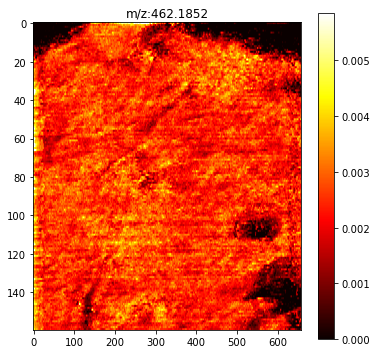

<Figure size 432x288 with 0 Axes>

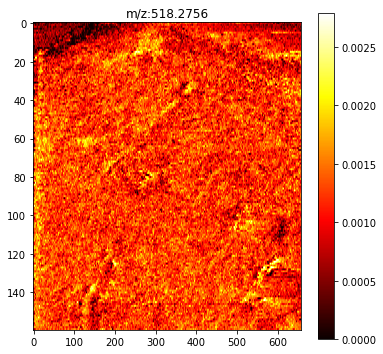

<Figure size 432x288 with 0 Axes>

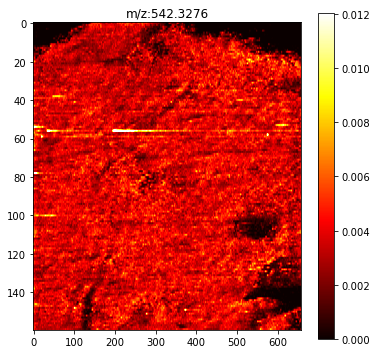

<Figure size 432x288 with 0 Axes>

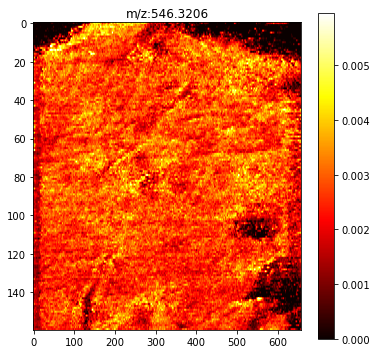

<Figure size 432x288 with 0 Axes>

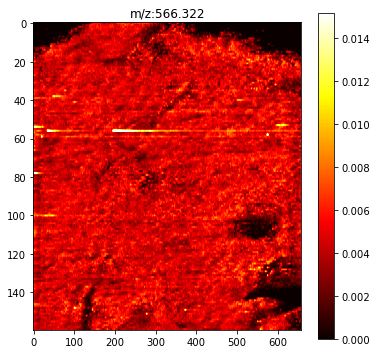

<Figure size 432x288 with 0 Axes>

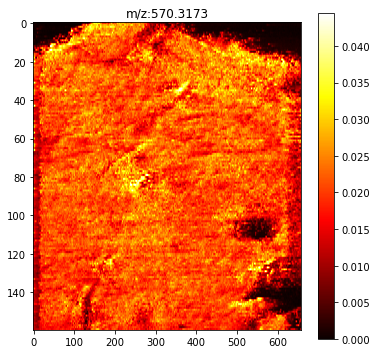

<Figure size 432x288 with 0 Axes>

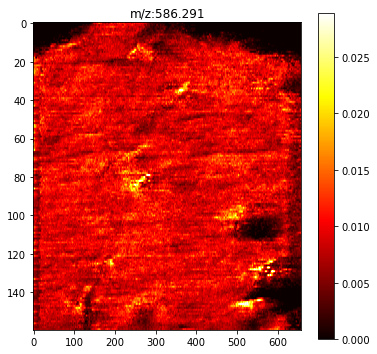

<Figure size 432x288 with 0 Axes>

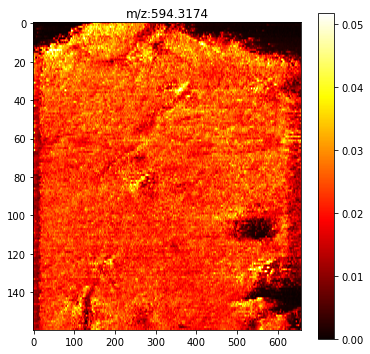

<Figure size 432x288 with 0 Axes>

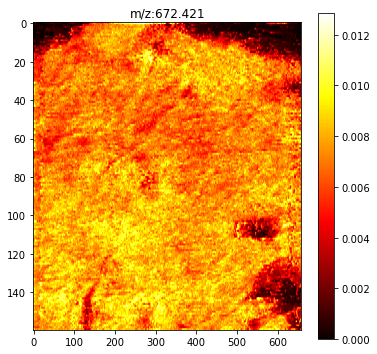

<Figure size 432x288 with 0 Axes>

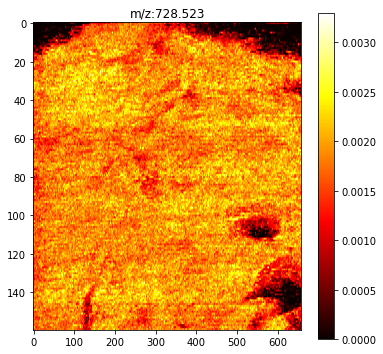

<Figure size 432x288 with 0 Axes>

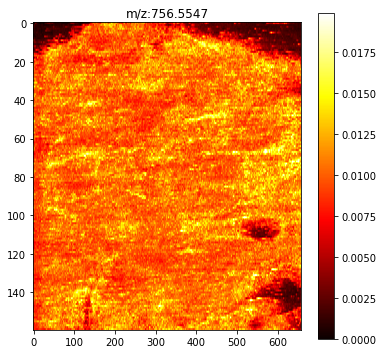

<Figure size 432x288 with 0 Axes>

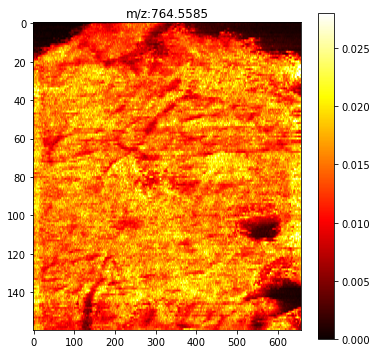

<Figure size 432x288 with 0 Axes>

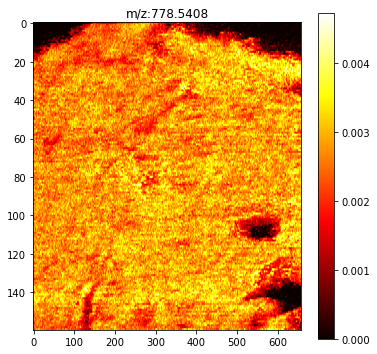

<Figure size 432x288 with 0 Axes>

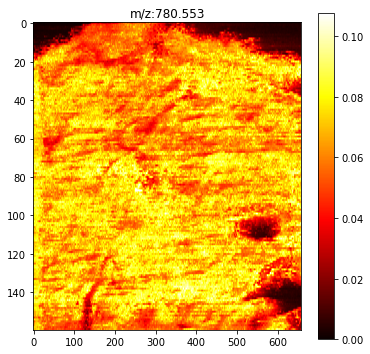

<Figure size 432x288 with 0 Axes>

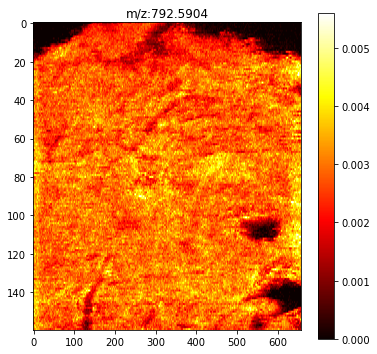

<Figure size 432x288 with 0 Axes>

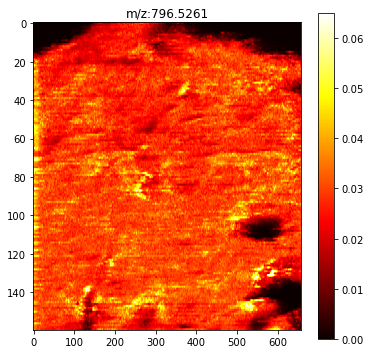

<Figure size 432x288 with 0 Axes>

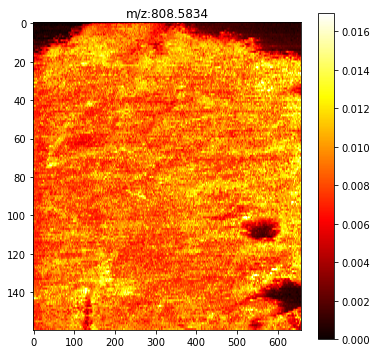

<Figure size 432x288 with 0 Axes>

In [8]:
#============================
# plot.show
# TIC normalization
#============================
# spike handling helps with the visualization
scale = 0.999

for i in tqdm(range(imgs_TICnorm.shape[0])):     # edit
    img = imgs_TICnorm[i]
    thre = np.quantile(img, scale)
    title = 'm/z:' + str(round(mzs[i], 4)) 
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='hot', aspect=aspect_ratio, vmax=thre) #, interpolation='none')
    plt.title(title)
    #plt.xticks([])
    #plt.yticks([])
    plt.colorbar()
    
    plt.show()
    plt.close()
    plt.clf()
    
    #break

## 2. save imzML files

In [26]:
### parameters
output_dir = "D:\\Manxi\\HubMAP\\human heart1 20210330\\HBM433.FHPB.264-IMS_lipids_pos" # edit
#NumLine
#NumSpePerLine
#mzs
#imgs_TICnorm

### write
with ImzMLWriter(output_dir, 
                 #mz_dtype = np.float32, 
                 #intensity_dtype = np.float16, 
                 polarity = 'positive') as w:
    
    # save data, top-down and left-right 
    for i in tqdm(range(NumLine)):
        for j in range(NumSpePerLine):
            
            # coord
            y = i+1
            x = j+1
            coord = (x, y, 1)  # z = 1 by default. 
            
            # spectrum: intensity, mzs (already have)
            intensities = imgs_TICnorm[:, i, j]
            w.addSpectrum(mzs, intensities, coord)

  0%|          | 0/160 [00:00<?, ?it/s]

## 3. Save OME-TIFF

In [9]:
### parameters
#=================================
file_name = 'HBM433.FHPB.264'   # edit
output_dir = "D:\\Manxi\\HubMAP\\human heart1 20210330\\HBM433_FHPB_264-IMS_lipids_pos_multilayer"  # edit
#mzs
#names
#width
#height
#imgs_TICnorm

### configuration
#=================================
channel_names = [f"{pn} - m/z {pz}" for pn, pz in zip(names, mzs)]
n_ch = imgs_TICnorm.shape[0]
y_size = imgs_TICnorm.shape[1]
x_size = imgs_TICnorm.shape[2]

stored_shape = (n_ch, 1, 1, y_size, x_size, 1)
im_shape = (n_ch, y_size, x_size)

phys_size_y = height / y_size
phys_size_x = width / x_size
print('finish configuration')

### write file header
#=================================
ome_meta = {
    "PhysicalSizeX": phys_size_x,
    "PhysicalSizeY": phys_size_y,
    "PhysicalSizeXUnit": "µm",
    "PhysicalSizeYUnit": "µm",
    "Name": file_name,
    "Channel": {"Name": channel_names},
}
print('finish meta data writing')

### write images
#=================================
omexml = OmeXml()
omexml.addimage(
    dtype=imgs_TICnorm.dtype,
    shape=im_shape,
    # specify how the image is stored in the TIFF file
    storedshape=stored_shape,
    **ome_meta,
)

ome_xml_str = omexml.tostring().encode("utf8")
print('finish meta data writing')

# write iamge page by page with OME metadata
with TiffWriter(output_dir, bigtiff=True) as tif:
    for channel_idx, image in enumerate(imgs_TICnorm):
        options = dict(
            compression="deflate",
            photometric="minisblack",
            metadata=None,
        )
        # write OME-XML to the ImageDescription tag of the first page
        description = ome_xml_str if channel_idx == 0 else None
        # write channel data
        print(f" writing channel {channel_idx}")
        tif.write(
            image,
            description=description,
            **options,
        )
print('finish image writing')

finish configuration
finish meta data writing
finish meta data writing
 writing channel 0
 writing channel 1
 writing channel 2
 writing channel 3
 writing channel 4
 writing channel 5
 writing channel 6
 writing channel 7
 writing channel 8
 writing channel 9
 writing channel 10
 writing channel 11
 writing channel 12
 writing channel 13
 writing channel 14
 writing channel 15
 writing channel 16
finish image writing


In [29]:
channel_names

['LPC 12:0  +Na - m/z 462.1852',
 'LPC 16:0  +Na - m/z 518.2756',
 'LPC 18:2  +Na - m/z 542.3276',
 'LPC 18:0  +Na - m/z 546.3206',
 'LPC 20:0  +Na - m/z 566.322',
 'LPC 20:2  +Na - m/z 570.3173',
 'LPC 20:2 +K - m/z 586.291',
 'LPC 22:4  +Na - m/z 594.3174',
 'PC 26:0  +Na - m/z 672.421',
 'PC 30:0  +Na - m/z 728.523',
 'PC 32:0  +Na - m/z 756.5547',
 'PC O-34:3 +Na - m/z 764.5585',
 'PC 34:3 +Na - m/z 778.5408',
 'PC 34:2 +Na - m/z 780.553',
 'PC P-36:3 +Na - m/z 792.5904',
 'PC 34:2 +Na - m/z 796.5261',
 'PC 36:2 +Na - m/z 808.5834']